# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | ola
Processing Record 4 of Set 1 | san fernando de apure
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | sao felix do xingu
Processing Record 7 of Set 1 | satsuma
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | ijuw
City not found. Skipping...
Processing Record 12 of Set 1 | awjilah
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 16 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 17 of Set 1 | aberdeen
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | malango
Processing Record 20 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,8.81,61,40,4.63,AR,1708309900
1,port-aux-francais,-49.3500,70.2167,4.69,79,79,7.99,TF,1708309944
2,ola,59.5833,151.2833,-20.48,65,99,2.23,RU,1708309946
3,san fernando de apure,7.8878,-67.4724,28.60,42,63,2.25,VE,1708309947
4,margaret river,-33.9500,115.0667,27.36,42,100,4.00,AU,1708309947


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,8.81,61,40,4.63,AR,1708309900
1,port-aux-francais,-49.3500,70.2167,4.69,79,79,7.99,TF,1708309944
2,ola,59.5833,151.2833,-20.48,65,99,2.23,RU,1708309946
3,san fernando de apure,7.8878,-67.4724,28.60,42,63,2.25,VE,1708309947
4,margaret river,-33.9500,115.0667,27.36,42,100,4.00,AU,1708309947


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

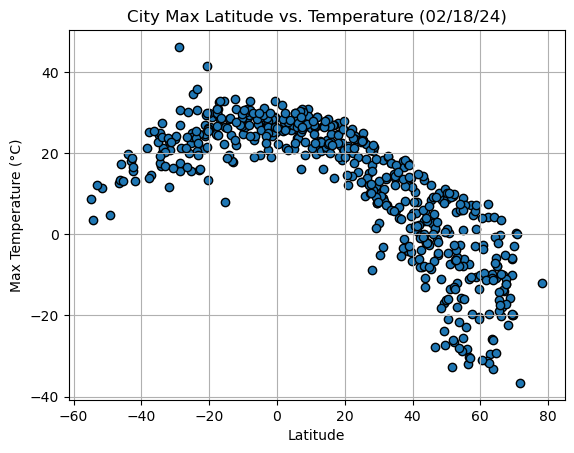

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

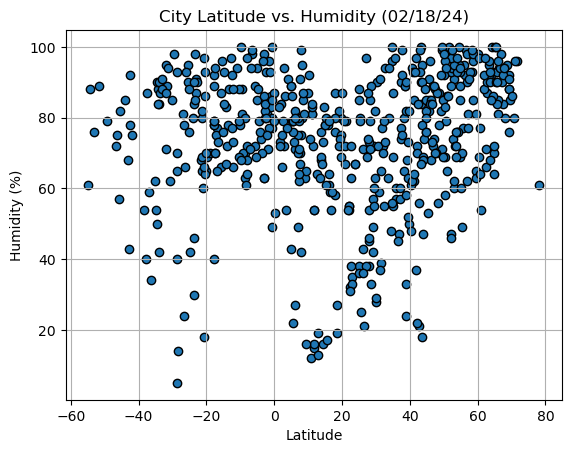

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

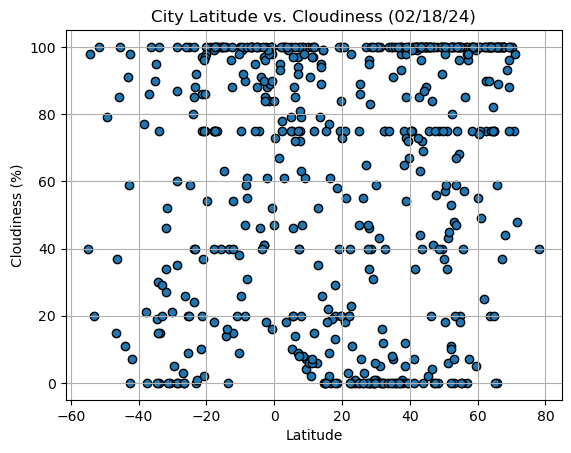

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

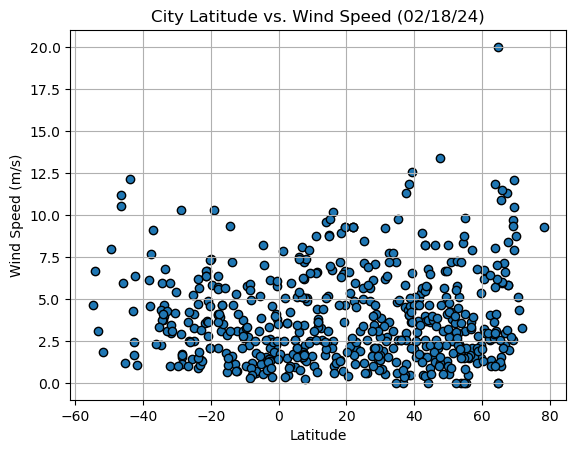

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")

    # Annotate the linear regression equation and r-squared value
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.annotate(f"r^2 = {round(rvalue**2, 2)}", (text_coordinates[0], text_coordinates[1]-10), fontsize=12, color="red")

    # Set labels and title
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.title(f'Linear Regression: Latitude vs. {title}')

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0][["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ola,59.5833,151.2833,-20.48,65,99,2.23,RU,1708309946
3,san fernando de apure,7.8878,-67.4724,28.60,42,63,2.25,VE,1708309947
6,satsuma,30.8532,-88.0561,9.01,59,43,1.90,US,1708309949
7,hawaiian paradise park,19.5933,-154.9731,21.04,80,100,4.63,US,1708309951
10,awjilah,29.1081,21.2869,11.97,57,0,3.20,LY,1708309955


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0][["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,8.81,61,40,4.63,AR,1708309900
1,port-aux-francais,-49.3500,70.2167,4.69,79,79,7.99,TF,1708309944
4,margaret river,-33.9500,115.0667,27.36,42,100,4.00,AU,1708309947
5,sao felix do xingu,-6.6447,-51.9950,23.39,98,100,0.58,BR,1708309948
8,bengkulu,-3.8004,102.2655,28.31,74,91,1.52,ID,1708309601


###  Temperature vs. Latitude Linear Regression Plot

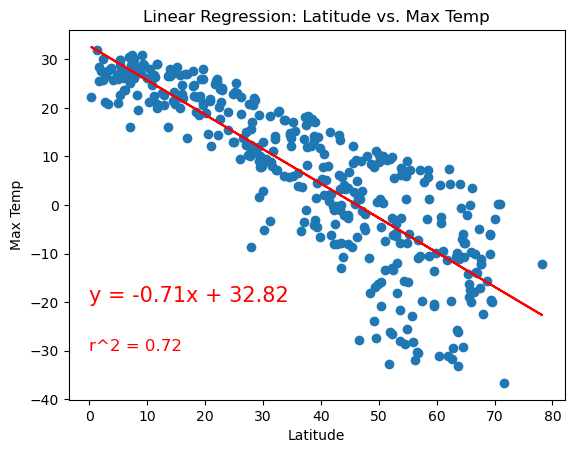

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (0, -20))


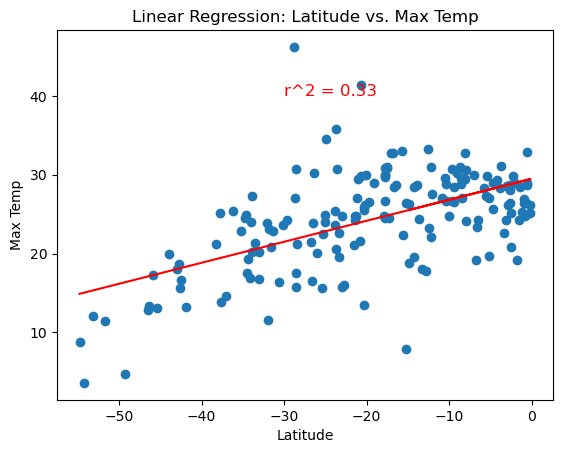

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisphere, there's typically a trend of decreasing temperature as you move away from the equator (latitude 0) towards the poles. This is reflected in a negative slope on the linear regression plot. In the southern hemisphere, the trend is similar, although the temperature tends to increase as you approach the equator.In the northern hemisphere, there's typically a trend of decreasing temperature as you move away from the equator (latitude 0) towards the poles. This is reflected in a negative slope on the linear regression plot. In the southern hemisphere, the trend is similar, although the temperature tends to increase as you approach the equator.

### Humidity vs. Latitude Linear Regression Plot

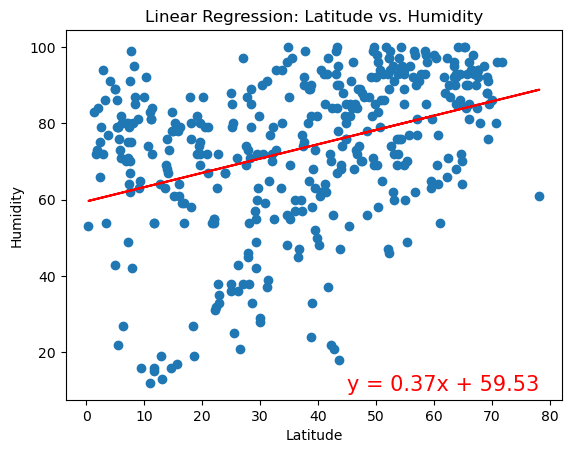

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (45, 10))

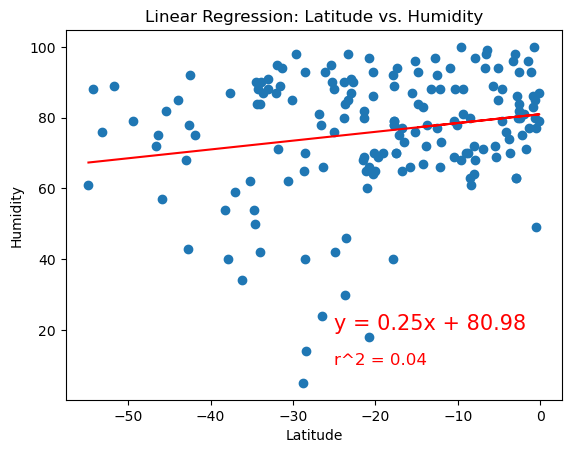

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-25, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There doesn't seem to be a strong correlation between humidity and latitude based on the linear regression plot. While there may be some observable trends in humidity levels relative to latitude, the relationship is complex.There doesn't seem to be a strong correlation between humidity and latitude based on the linear regression plot. While there may be some observable trends in humidity levels relative to latitude, the relationship is complex.

### Cloudiness vs. Latitude Linear Regression Plot

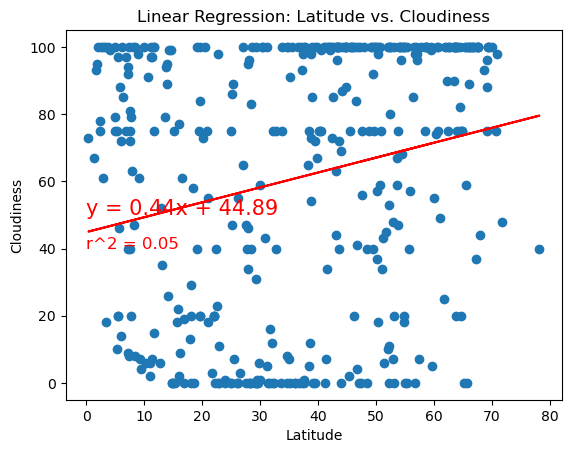

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (0, 50))

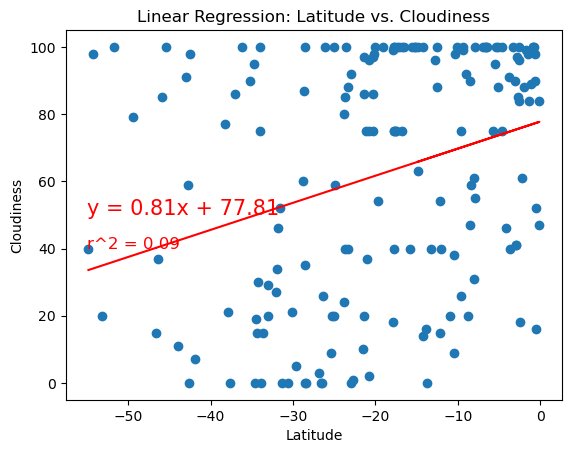

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based on the Linear Regression Plot, there doesn't seem to be a clear correlation between cloudiness and latitude. The distribution of data points appears to be scattered, indicating that cloudiness levels vary widely across different latitudes.Based on the Linear Regression Plot, there doesn't seem to be a clear correlation between cloudiness and latitude. The distribution of data points appears to be scattered, indicating that cloudiness levels vary widely across different latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

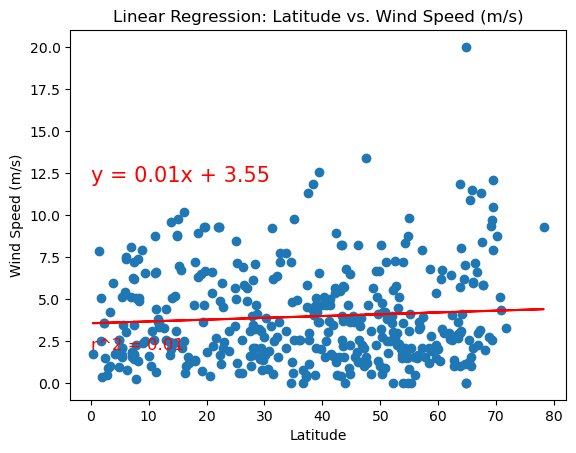

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed (m/s)', (0, 12))

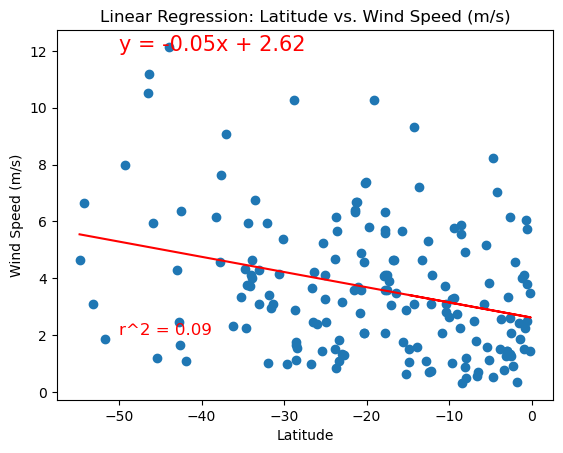

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed (m/s)', (-50, 12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The Linear Regression Plot for Wind Speed vs. Latitude doesn't show a clear correlation between the two variables. The data points are scattered, suggesting that wind speed doesn't have a consistent relationship with latitude.The Linear Regression Plot for Wind Speed vs. Latitude doesn't show a clear correlation between the two variables. The data points are scattered, suggesting that wind speed doesn't have a consistent relationship with latitude.